<a href="https://colab.research.google.com/github/johanaluna/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Johana_LS_DS7_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!



##SLN:
Write a function def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk) that reproduces the example from lecture, and use it to calculate and visualize a range of situations



![](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)


* true positives that are drunk is 100% (positive|drunk)
* 1/100 are drunk 
* 8% are False Positive (positive| not drunk)


Formula:

P(Drunk|Positive) = P(Positive|Drunk) * P(Drunk) / P(Positive)

P(Drunk|Positive) = P(Positive|Drunk) * P(Drunk) /
                  (P(Positive|Drunk) * P(Drunk))  +  (P(Positive|Not Drunk) * P(Not Drunk)


                    







In [0]:
# TODO - code!
import pandas as pd


In [0]:

prior= 1/1000
positive_drunk=1
positive_not_drunk= 0.08

In [0]:
def prob_drunk_positive(drunk,positive_drunk, positive_not_drunk):
  probabilities=[]
  iterations= range(1,4)
  for x in iterations:
    if x>1:
      prior= probabilities[-1]
    else :
      prior= drunk
    not_drunk= 1-drunk
    prob_positive = (positive_drunk*prior) + (positive_not_drunk*not_drunk)
    posterior_prob= (positive_drunk*prior)/prob_positive
    probabilities.append(posterior_prob)
  return (probabilities)


In [5]:
prob_drunk_positive(1/1000,1,0.08)

[0.012357884330202669, 0.13392032576279944, 0.6262631956114275]

## SLN 2:
Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
url='https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
df = pd.read_csv(url, 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

In [7]:
print(df.shape)

(435, 17)


In [8]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [9]:
republican = df[df.party == "republican"]#split data by party
print(republican.shape)
republican.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [10]:
democrat = df[df.party == "democrat"]
print(democrat.shape)
democrat.head()

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
 namescolumns=['handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [41]:
data= df['handicapped-infants'].dropna()
data_mean, data_var, data_std = stats.bayes_mvs(data, alpha=0.95)
data_std

Std_dev(statistic=0.49810794333785724, minmax=(0.4658217507316141, 0.5331963357916057))

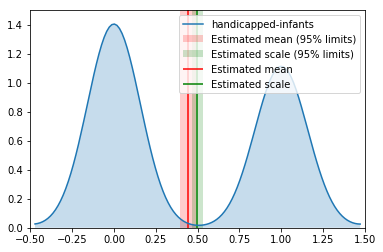

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot(111)
sns.kdeplot(data, shade='blue');
ax.vlines(data_mean.statistic, 0, 1.5, colors='r', label='Estimated mean')
ax.axvspan(data_mean.minmax[0],data_mean.minmax[1], facecolor='r',alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(data_std.statistic, 0, 1.5, colors='g', label='Estimated scale')
ax.axvspan(data_std.minmax[0],data_std.minmax[1], facecolor='g', alpha=0.2,label=r'Estimated scale (95% limits)');
ax.legend(fontsize=10)
ax.set_xlim([-.5, 1.5])
ax.set_ylim([0, 1.5])
plt.show();

# **ALL my DataFrame


In [19]:
# data= df['education'].dropna()
# data_mean, data_var, data_std = stats.bayes_mvs(data, alpha=0.95)
bayes_result=[]
def calculate_bayes(data):
  for x in data:
    data_mean, data_var, data_std = stats.bayes_mvs(df[x].dropna(), alpha=0.95)
    bayes_result.append([x,data_mean.statistic, data_mean.minmax[0],data_mean.minmax[1],data_var.statistic,data_var.minmax[0],data_var.minmax[1], data_std.statistic,data_std.minmax[0],data_std.minmax[1]])
  return bayes_result

calculate_bayes(namescolumns)

df_result = pd.DataFrame(bayes_result, columns=['Project','Mean','Mean_max_low','Mean_max_upper','Variance','Var_max_low','Var_max_upper','Standard Deviation','Std_max_low','Std_max_upper']) #create data frame with my list
df_result

,Project,Mean,Mean_max_low,Mean_max_upper,Variance,Var_max_low,Var_max_upper,Standard Deviation,Std_max_low,Std_max_upper
0,handicapped-infants,0.442080,0.394560,0.489600,0.248407,0.216990,0.284298,0.498108,0.465822,0.533196
1,water-project,0.503876,0.453841,0.553911,0.251938,0.218717,0.290121,0.501608,0.467672,0.538629
2,budget,0.596698,0.549815,0.643581,0.242364,0.211745,0.277338,0.492013,0.460158,0.526629
3,physician-fee-freeze,0.417453,0.370323,0.464582,0.244919,0.213977,0.280261,0.494599,0.462577,0.529397
4,el-salvador-aid,0.504762,0.456750,0.552774,0.251776,0.219826,0.288293,0.501472,0.468856,0.536929
5,religious-groups,0.641509,0.595678,0.687341,0.231614,0.202353,0.265036,0.480977,0.449837,0.514817
6,anti-satellite-ban,0.567696,0.520181,0.615211,0.247179,0.215847,0.282983,0.496873,0.464594,0.531962
7,aid-to-contras,0.576190,0.528737,0.623644,0.245952,0.214741,0.281624,0.495638,0.463402,0.530683
8,mx-missile,0.501211,0.452788,0.549633,0.251828,0.219618,0.288683,0.501519,0.468634,0.537293
9,immigration,0.504673,0.457116,0.552230,0.251743,0.220079,0.287887,0.501445,0.469126,0.536551


In [20]:
df_result.set_index('Project',inplace=True) #make project as an idex
df_result=df_result.T #traspose to see better my data
df_result

Project,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
Mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.576190,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
Mean_max_low,0.394560,0.453841,0.549815,0.370323,0.456750,0.595678,0.520181,0.528737,0.452788,0.457116,0.315825,0.374884,0.461165,0.546017,0.379253,0.770438
Mean_max_upper,0.489600,0.553911,0.643581,0.464582,0.552774,0.687341,0.615211,0.623644,0.549633,0.552230,0.408813,0.471651,0.558348,0.640586,0.475784,0.854939
Variance,0.248407,0.251938,0.242364,0.244919,0.251776,0.231614,0.247179,0.245952,0.251828,0.251743,0.232730,0.245938,0.251747,0.243039,0.246564,0.153618
Var_max_low,0.216990,0.218717,0.211745,0.213977,0.219826,0.202353,0.215847,0.214741,0.219618,0.220079,0.202997,0.214155,0.219437,0.212129,0.214810,0.131827
Var_max_upper,0.284298,0.290121,0.277338,0.280261,0.288293,0.265036,0.282983,0.281624,0.288683,0.287887,0.266747,0.282361,0.288735,0.278380,0.282934,0.178951
Standard Deviation,0.498108,0.501608,0.492013,0.494599,0.501472,0.480977,0.496873,0.495638,0.501519,0.501445,0.482128,0.495613,0.501436,0.492693,0.496245,0.391643
Std_max_low,0.465822,0.467672,0.460158,0.462577,0.468856,0.449837,0.464594,0.463402,0.468634,0.469126,0.450552,0.462769,0.468441,0.460574,0.463476,0.363080
Std_max_upper,0.533196,0.538629,0.526629,0.529397,0.536929,0.514817,0.531962,0.530683,0.537293,0.536551,0.516475,0.531376,0.537341,0.527617,0.531915,0.423025


In [24]:
a=df_result['education']
a[0]

0.42326732673267325

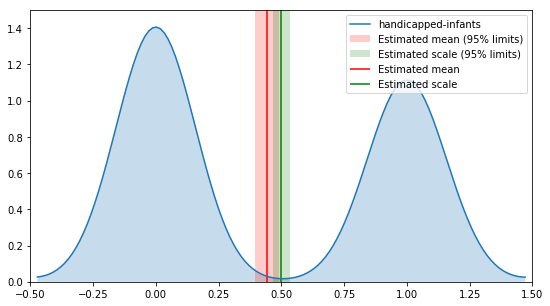

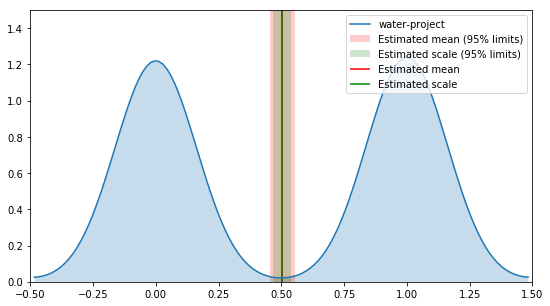

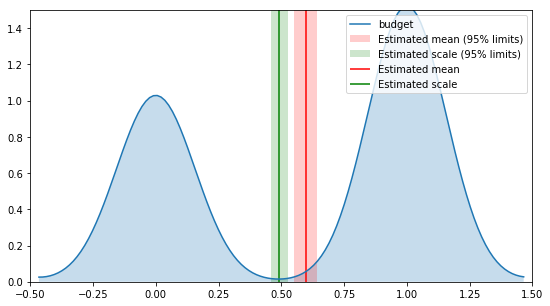

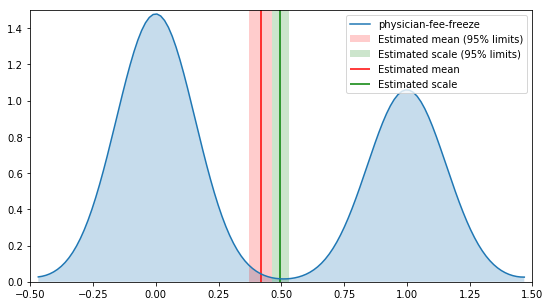

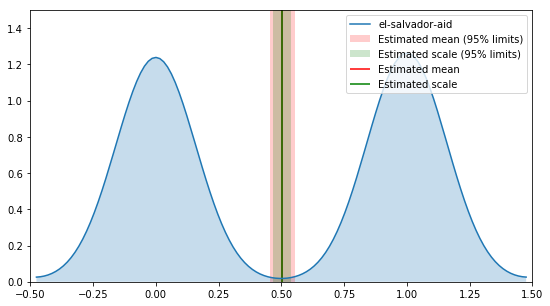

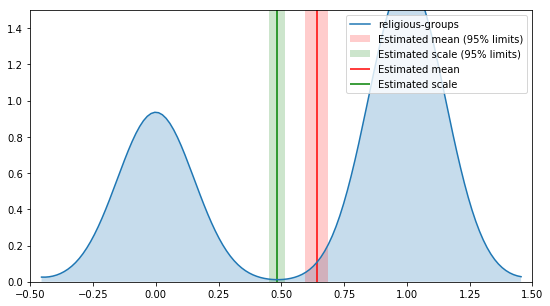

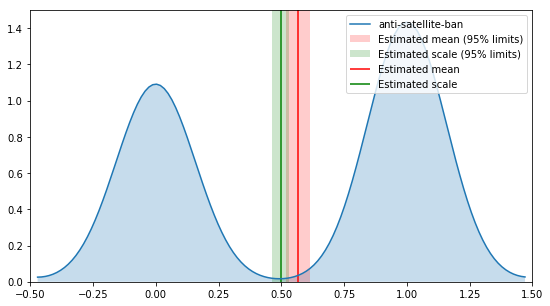

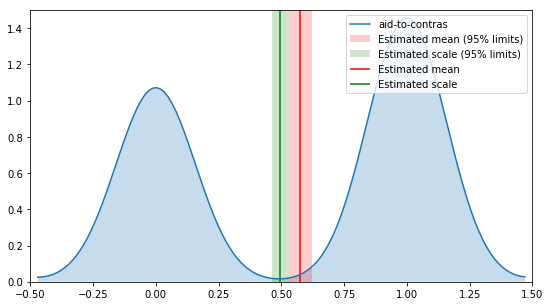

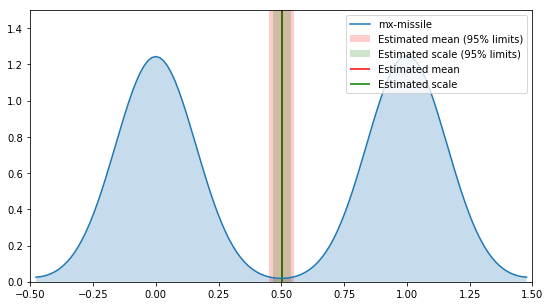

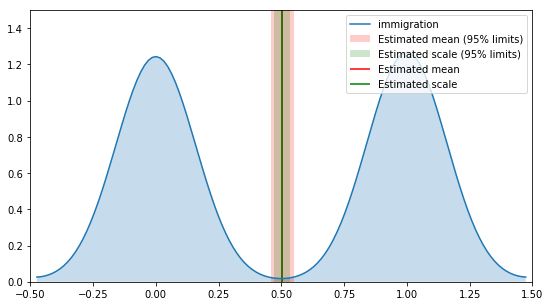

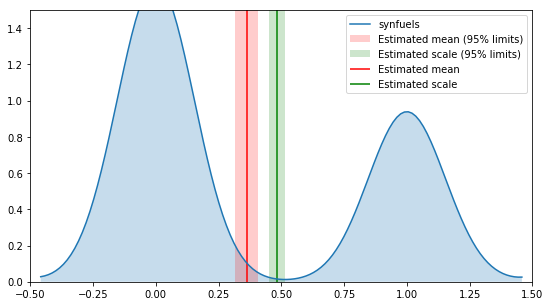

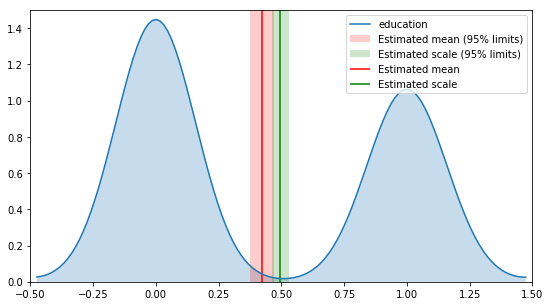

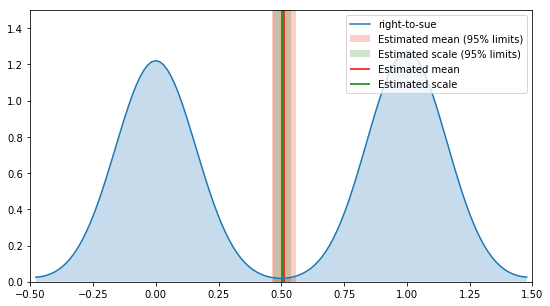

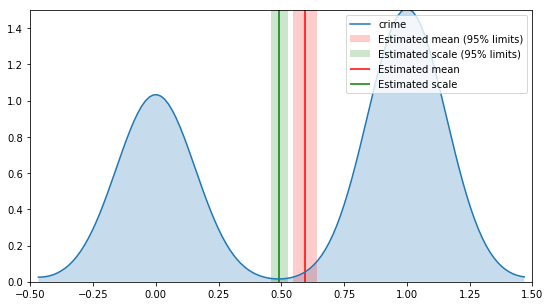

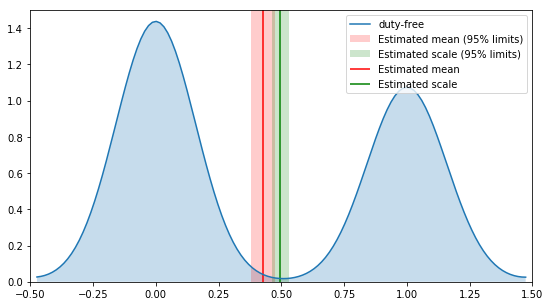

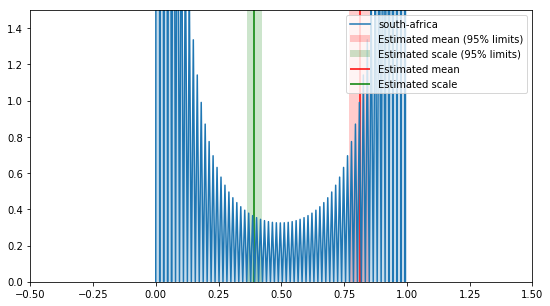

In [44]:

for x in namescolumns:  
  fig = plt.figure(figsize=(9,5))
  ax = fig.add_subplot(111)
  sns.kdeplot(df[x].dropna(), shade='blue');
  ax.vlines(df_result[x][0], 0, 1.5, colors='r', label='Estimated mean')
  ax.axvspan(df_result[x][1],df_result[x][2], facecolor='r',alpha=0.2, label=r'Estimated mean (95% limits)')
  ax.vlines(df_result[x][6], 0, 1.5, colors='g', label='Estimated scale')
  ax.axvspan(df_result[x][7],df_result[x][8], facecolor='g', alpha=0.2,label=r'Estimated scale (95% limits)');
  ax.legend(fontsize=10, loc='upper right')
  ax.set_xlim([-.5, 1.5])
  ax.set_ylim([0, 1.5])
  plt.show();


In your own words, summarize the difference between Bayesian and Frequentist statistics

Bayesian inference
* uses probabilities and depends on the prior and likelihood of observed data.
* I use my prior beliefs to make inferences about events that I observe.

Frequentist inference (NHST)
* depends on the likelihood for the observed and unobserved data( not need a prior)
* I think that there is a single true value for the unknowns that we seek and it’s the data that is random and incomplete.

## Resources

impor- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

In [0]:
import scipy 



a= [1184, 1203, 1219, 1238, 1243, 1204, 1269, 1256, 1156, 1248] 
b=[1136, 1178, 1212, 1193, 1226, 1154, 1230, 1222, 1161, 1148] 
meana=1222
meanb=1186

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')